<a href="https://colab.research.google.com/github/jayparekh4801/pytorch-learnings/blob/master/Torch_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [21]:
class Model(nn.Module):
  def __init__(self, input_dim=10):
    super().__init__()
    self.fc1 = nn.Linear(input_dim, 4)
    self.fc2 = nn.Linear(4, 4)
    self.out = nn.Linear(4, 3)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [3]:
torch.manual_seed(41)

In [5]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"

In [6]:
df = pd.read_csv(url)

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
df["species"] = df["species"].replace("setosa", 0.0)
df["species"] = df["species"].replace("virginica", 1.0)
df["species"] = df["species"].replace("versicolor", 2.0)

<ipython-input-8-e4a492a313a4>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["species"] = df["species"].replace("versicolor", 2.0)


In [19]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.0
146,6.3,2.5,5.0,1.9,1.0
147,6.5,3.0,5.2,2.0,1.0
148,6.2,3.4,5.4,2.3,1.0


In [9]:
X = df.drop(["species"], axis=1)
y = df["species"]

In [10]:
X = X.values
y = y.values

In [11]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=41)

In [12]:
train_X = torch.FloatTensor(train_X)
test_X = torch.FloatTensor(test_X)

In [13]:
train_y = torch.LongTensor(train_y)
test_y = torch.LongTensor(test_y)

In [22]:
model = Model(input_dim=train_X.shape[1])

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [29]:
epochs = 10000

all_losses = []

for itr in range(epochs):
  y_pred = model.forward(train_X)
  loss = criterion(y_pred, train_y)
  all_losses.append(loss.detach().numpy())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

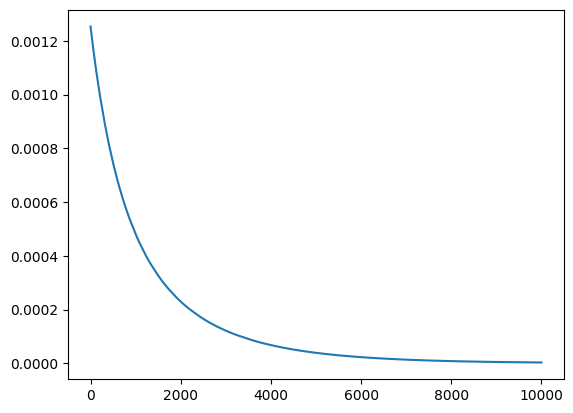

In [30]:
plt.plot(all_losses)

In [42]:
with torch.no_grad():
  y_test_pred = model.forward(test_X)
  loss = criterion(y_test_pred, test_y)

In [43]:
loss

tensor(1.7103)

In [50]:
count = 0
for pred, actual in zip(y_test_pred, test_y):
  if pred.argmax().item() == actual:
    count += 1

In [51]:
count

28

In [ ]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [59]:
new_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [60]:
with torch.no_grad():
  print(model(new_iris))

tensor([-16.8034,  37.4397, -10.7257])


In [64]:
# save NN model
torch.save(model.state_dict(), "iris_model1.pt")

In [66]:
# load saved model
saved_model = Model(input_dim=4)
saved_model.load_state_dict(torch.load("iris_model1.pt"))

<ipython-input-66-7c85104da27f>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  saved_model.load_state_dict(torch.load("iris_model1.pt"))


<All keys matched successfully>

In [67]:
with torch.no_grad():
  print(saved_model(new_iris))

tensor([-16.8034,  37.4397, -10.7257])
